In [1]:
import pandas as pd 
from scipy.stats import ttest_ind, norm, stats, shapiro, boxcox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
value = {
    'height': [178,166,145,256,222,134,138,139,190,777,187,185,182],
    'weight': [180,170,154,188,169,154,133,154,205,1111,321,157,180],
    'age': [22,65,32,15,48,15,66,49,35,84,13,666,81]
}


In [3]:
df = pd.DataFrame(value)
df.describe()

,height,weight,age
count,13.000000,13.000000,13.000000
mean,223.000000,252.000000,91.615385
std,170.067634,262.190452,174.331360
min,134.000000,133.000000,13.000000
25%,145.000000,154.000000,22.000000
50%,182.000000,170.000000,48.000000
75%,190.000000,188.000000,66.000000
max,777.000000,1111.000000,666.000000


In [4]:
h_mean = df['height'].mean()
h_std = df['height'].std()
h_median = df['height'].median()

print(f"height mean: {h_mean:.2f}")
print(f"height standard: {h_std:.2f}")
print(f"height median: {h_median:.4f}")

height mean: 223.00
height standard: 170.07
height median: 182.0000


In [5]:
#CDF: culumative distribution function
p_180 = norm.cdf(180, loc = h_mean, scale = h_std)
p_200 = norm.cdf(200, loc = h_mean, scale = h_std)

p_bet = p_200 - p_180 

print(f"probability 180: {p_180:.2f}")
print(f"probability 200: {p_200:.2f}")
print(f"probability between 180 and 200 : {p_bet:.2f}")

probability 180: 0.40
probability 200: 0.45
probability between 180 and 200 : 0.05


In [6]:
#PDF: probability Density Function
pdf_180 = norm.pdf(180, loc = h_mean, scale = h_std)
pro_180_range = pdf_180 * 1.0

print(pdf_180 , pro_180_range)

0.002271990597339538 0.002271990597339538


In [7]:
#Correlation
correlation = df['height'].corr(df['weight'])
print(f"correlation between height and weight : {correlation:.3f}")


correlation between height and weight : 0.976


In [8]:
#Boxplot
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1 
low = q1 - 1.5*iqr 
upper = q3 + 1.5*iqr 

outliers = ((df < low) | (df > upper)).any(axis = 1)

num_outliers = outliers.sum()


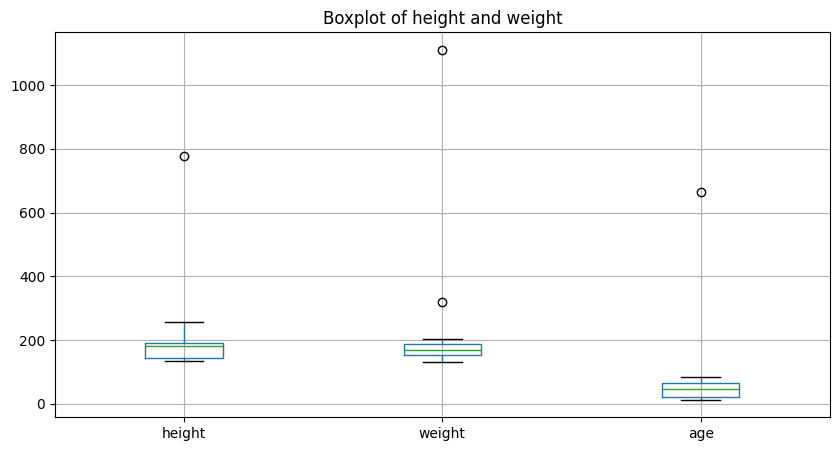

3


In [9]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.title('Boxplot of height and weight')
plt.grid(True)
plt.show()
print(num_outliers)

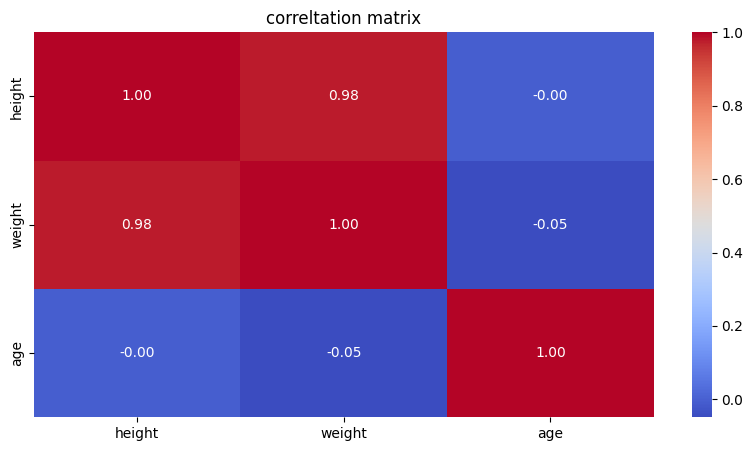

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('correltation matrix')
plt.show()

In [11]:
#Hypothesis testing

group1 = np.random.normal(175,10,50) # team1
group2 = np.random.normal(160,10,50) # team2

t_stat, p_value = ttest_ind(group1,group2)
print(f"t-test: {t_stat:.4f}, p-value: {p_value:.4f}")

t-test: 6.5677, p-value: 0.0000


In [12]:
stat, p = shapiro(df['height'])
print(f"shapiro - wilk test: stat = {stat:.4f}, p-value = {p:.3f}")

shapiro - wilk test: stat = 0.4942, p-value = 0.000


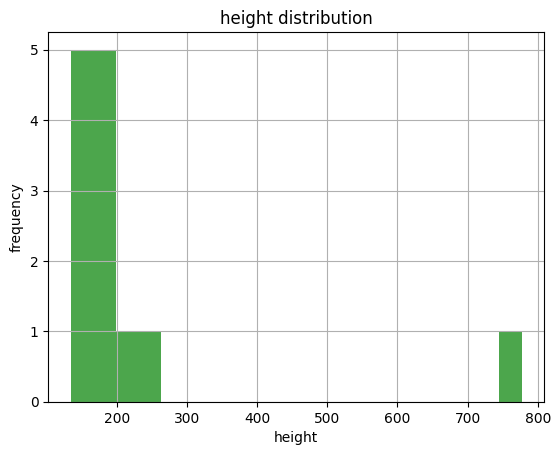

In [13]:
df['height'].hist(bins = 20, color = 'green' , alpha = 0.7)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('height distribution')
plt.show()

In [14]:
#transformation to box-cox
df['height_transformed'] , best_lambda = boxcox(df['height']+1)
print(f"optimal lambda: {best_lambda:.4f}")

optimal lambda: -1.9302


In [15]:
# Moving Average
df['rolling_mean'] = df['height'].rolling(window=4).mean()
df

,height,weight,age,height_transformed,rolling_mean
0,178,180,22,0.518067,NaN
1,166,170,65,0.518063,NaN
2,145,154,32,0.518055,NaN
3,256,188,15,0.518078,186.25
4,222,169,48,0.518075,197.25
5,134,154,15,0.518050,189.25
6,138,133,66,0.518052,187.50
7,139,154,49,0.518053,158.25
8,190,205,35,0.518069,150.25
9,777,1111,84,0.518088,311.00


In [19]:
#A/B testing
np.random.seed(55)
conversion_rate_a = 0.08 #rate as 8%
sample_size_a = 5000
conversions_a = np.random.binomial(sample_size_a, conversion_rate_a)


conversion_rate_b = 0.1 #rate as 10%
sample_size_b = 5000
conversions_b = np.random.binomial(sample_size_b , conversion_rate_b)

pa = conversions_a / sample_size_a
pb = conversions_b / sample_size_b

se_a = np.sqrt(pa* (1-pa) / sample_size_a)
se_b = np.sqrt(pb* (1-pb) / sample_size_b)

z_score = (pb-pa)/np.sqrt(se_a ** 2 + se_b ** 2)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

result = {
    "conversion rate a" : pa, 
    "conversion rate b" : pb,
    "z_score": z_score,
    "p-value": p_value
}

result

{'conversion rate a': 0.0738,
 'conversion rate b': 0.1038,
 'z_score': np.float64(5.280591659482915),
 'p-value': np.float64(1.2876738542111354e-07)}

p-value: 0.0000
